In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import plotly.express as px

In [7]:
# image = cv.imread('arucoMarkersImages/singlemarkerssource.png')
#image = cv.imread('arucoMarkersImages/6x6_250.jpg') 

import os


fileDir = 'c:/Users/faire/Documents/_DigitalAssembly/GoldenEye/InitialData/test_images/charuco/333/11_2023-05-04_17_52_48_881.bmp'

image = cv.imread(fileDir, cv.IMREAD_COLOR) #cv.aruco.DICT_4X4_50

In [8]:
type(image)

numpy.ndarray

In [9]:
#init 

dictionary = cv.aruco.getPredefinedDictionary(cv.aruco.DICT_4X4_50)
parameters =  cv.aruco.DetectorParameters()
detector = cv.aruco.ArucoDetector(dictionary, parameters)

"{d        |       | dictionary: DICT_4X4_50=0, DICT_4X4_100=1, DICT_4X4_250=2,"
"DICT_4X4_1000=3, DICT_5X5_50=4, DICT_5X5_100=5, DICT_5X5_250=6, DICT_5X5_1000=7, "
"DICT_6X6_50=8, DICT_6X6_100=9, DICT_6X6_250=10, DICT_6X6_1000=11, DICT_7X7_50=12,"
"DICT_7X7_100=13, DICT_7X7_250=14, DICT_7X7_1000=15, DICT_ARUCO_ORIGINAL = 16}"

'DICT_7X7_100=13, DICT_7X7_250=14, DICT_7X7_1000=15, DICT_ARUCO_ORIGINAL = 16}'

In [10]:
points = []
markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(image)

In [11]:
def detectCentersAndDrawArucoMarkers(image):
    '''returns coordinates [u, v, index], also draws fig'''
    frame = image
    points = []
    markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(frame)
    #print(markerCorners, markerIds, rejectedCandidates)

    frame_markers = cv.aruco.drawDetectedMarkers(image=frame.copy(), corners=markerCorners, ids=markerIds)
    plt.figure(figsize=(30, 30))
    plt.imshow(frame_markers)
    for i in range(len(markerIds)):
        c = markerCorners[i][0]
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(markerIds[i]))
        points.append([c[:, 0].mean(), c[:, 1].mean(), markerIds[i][0]])
    
    plt.legend()
    plt.show()
    plt.savefig('detectedTargets.png')
    return points

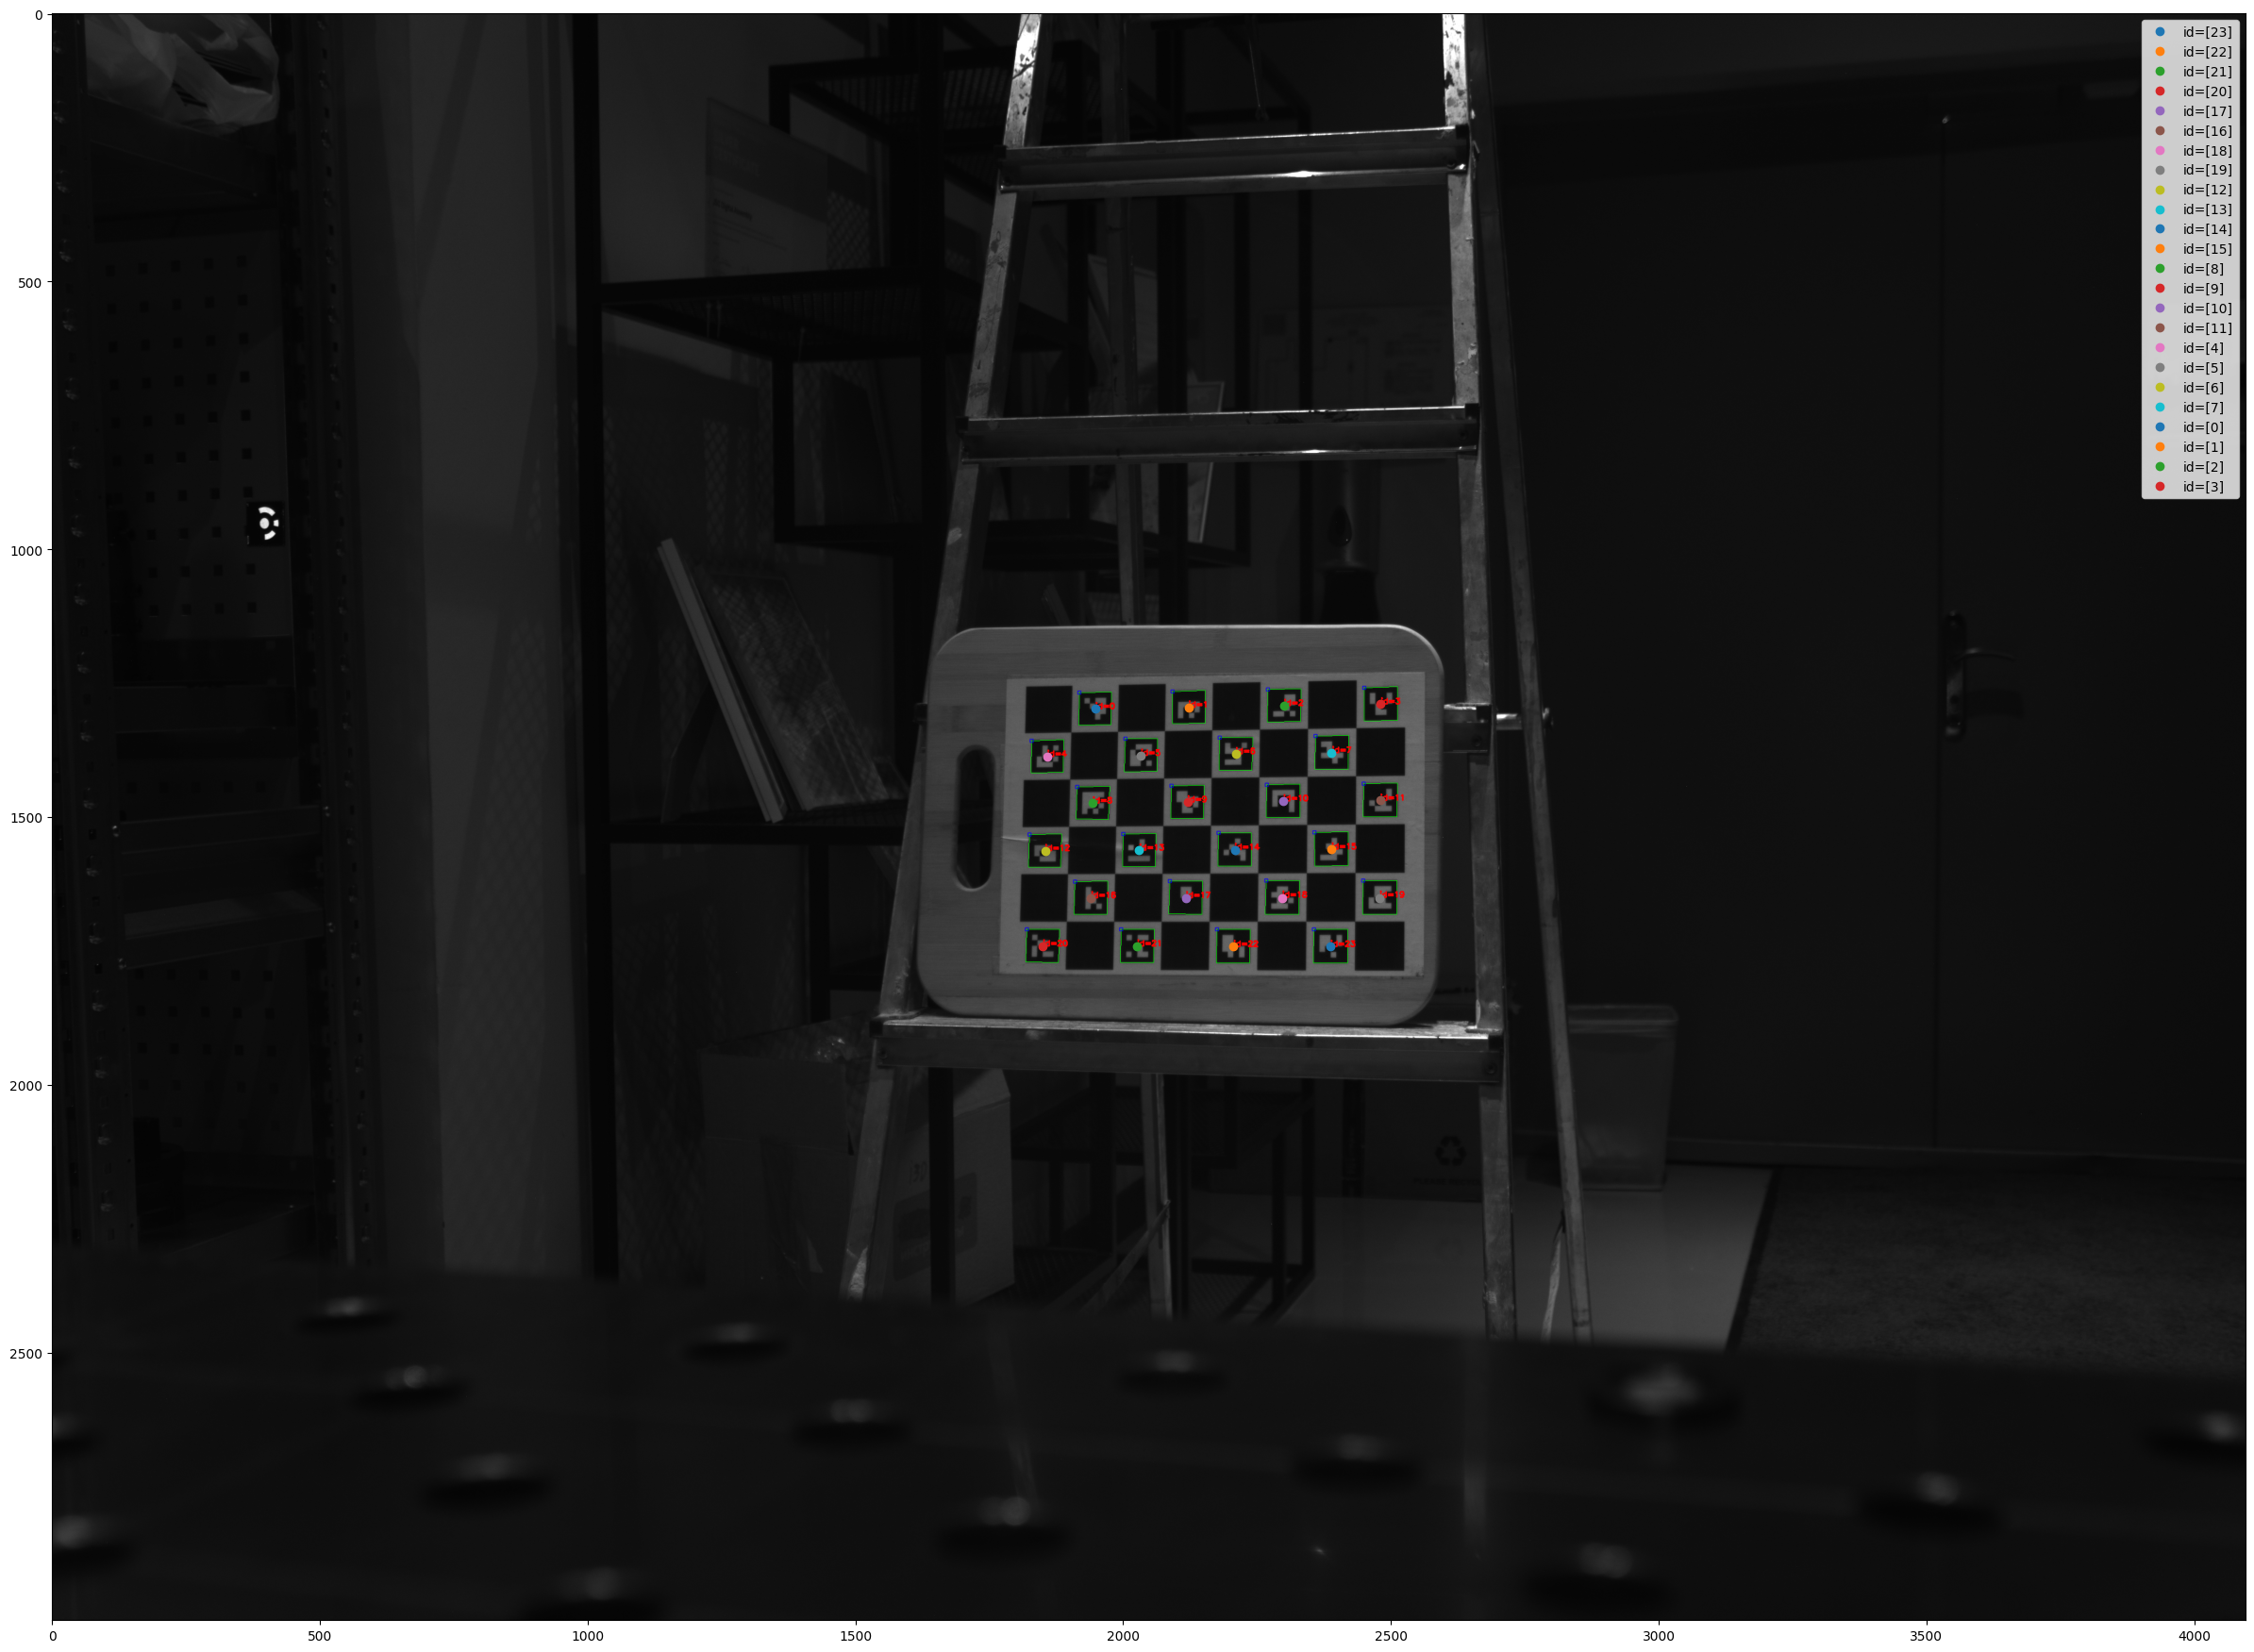

<Figure size 640x480 with 0 Axes>

In [12]:
centre_points = detectCentersAndDrawArucoMarkers(image)

In [17]:
pd.DataFrame(centre_points)

,0,1,2
0,2387.25,1741.50,23
1,2205.50,1741.50,22
2,2026.50,1741.00,21
3,1849.50,1740.75,20
4,2116.75,1650.75,17
5,1939.75,1651.25,16
6,2297.25,1650.50,18
7,2479.25,1650.50,19
8,1854.00,1563.25,12
9,2030.00,1562.25,13


In [18]:
# пока не рисует точки, посмотреть альтернативные варианты
# from PIL import Image, ImageDraw

# img = Image.open(fileDir)  
# draw = ImageDraw.Draw(img)

# #for i in image:
# image[1905, 1158] = [0,0,255] # Рисуем красную точку по координатам точки i
# #image.save('2.png')
# cv.imwrite('2.png', image)

True

In [19]:
# px.scatter(centre_points)

In [20]:
# cv.aruco.calibrateCameraAruco(corners, ids, counter, board, imageSize, cameraMatrix, distCoeffs)

In [21]:
# gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [22]:
# cv.aruco.ArucoDetector.detectMarkers(gray)